<a href="https://colab.research.google.com/github/michellssgui22/PROJETOS_ESTUDO/blob/main/Mini_Projeto_Roof_Imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Projeto - Roof Imóveis
### Michel Souza Santana - 13923
> Entrega 01 - Slot 03

## Contextualização
* Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro
e quer expandir sua área de atuação fazendo um investimento internacional,
com isso, ela contratou você para uma consultoria estratégica.
* A empresa irá investir em imóveis no Condado de County, nos Estados
Unidos.
* Utilizando o dataset disponibilizado, você irá aplicar os conceitos de
CRISP-DM aprendidos até o momento em um projeto prático, que busca
desenvolver seu pensamento analítico, insights e tomada de decisões.

## King County - Condado de King - Washington
* O Condado de King é um dos 39 condados do estado americano de
Washington. A sede e cidade mais populosa do condado é Seattle.
* Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo
com o censo nacional de 2020, é o condado mais populoso do estado e o 12o
mais populoso do país. Wikipédia
* O Dataset apresenta a venda de imóveis e suas características na região
de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total
de 21 atributos.

> Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

> Dataset detalhado: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

### 1.2 Descrevendo os dados:
O Dataset objeto deste jupyter notebook é referente aos dados de venda de imóveis em *King's County*, condado do estado americano de Washington, entre maio de 2014 e maio de 2015.

Segue a descrição dos dados contindos no referido dataset:

variável | Descrição
----|----
id |	Número de identificação do imóvel
date |	Data da venda
price |	Preço do imóvel na venda
bedrooms |	Número de quartos
bathrooms |	Número de banheiros
sqft_liv |	Tamanho da área habitável, em pés quadradps (square feet).
sqft_lot |	Tamanho do lote do imóvel, em pés quadradps (square feet).
floors | 	Número de andares
waterfront |	Classificação de beira-mar. ‘1’ se a propriedade é beira-mar, ‘0’ em caso negativo.
view |	Classificação de 0 a 4 do quão boa é a visão da propriedade.
condition |	Condição do imóvel, classificado de 1 a 5.
grade |	Classificação da qualidade da construção e materiais. Indicadores de 1 a 13. Mais informações no site governamental do [condado](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g).
sqft_above |	Área de construção acima do térreo.
sqft_basmt |	Área de construção abaixo do solo.
yr_built |	Ano de construção.
yr_renov |	Ano de renovação. '0' se nunca renovado.
zipcode |	Código postal americano contendo 5 dígitos.
lat |	Latitude.
long |	Longitude.
squft_liv15 |	Média de tamanho interior das 15 casas mais próximas, em pés quadrados.
squft_lot15 |	Média de tamanho dos lotes das 15 casas mais próximas, em pés quadrados.


## O Que Devo Fazer?
* A empresa te contratou pois quer saber qual seria os 5 imóveis que
ela deveria investir e o porquê e quais 5 você não recomendaria o
investimento de jeito nenhum.
* Você deve montar um colab bem redigido mostrando o passo a
passo das etapas de análise do case, fazendo uma introdução e dados
atuais sobre o problema.
* Também é importante ressaltar/explicar passagens complexas
ou insights que você tiver durante a resolução desse projeto.

## A Questão de Negócio:

#### Qual a meta?
* Identificar os 5 imóveis mais valorizados e destacar sua cidade

#### Como posso chegar?
* Analisando os dados estarei verificando os imóveis que tiveram mais de uma venda e analizando se no decorrer do tempo houve valorização ou desvalorização deste.

## Entendimento do Negócio:

#### Quais dados eu tenho disponível?
* Dados colhidos junto ao site da Kaglle
> https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/download?datasetVersionNumber=1

#### Eles são relevantes para o problema?
* A principio, sim. Percebe-se logo no inicio a necessidade de tratamento de algumas colunas e talvêz a agregação de mais dados para localização e identificação das cidades.

#### Eles me trazem uma solução direta?
* Não, precisão ser analizados, filtrados e organizados.

#### Qual o meu setor ou range de negócio?
* Imobiliário

## A Coleta de Dados:

In [1277]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importadas as bibliotecas, realizamos a visualização de parte do Dataframe, a fim de verificarmos o formato e disposição dos dados:

In [1278]:
# importando dataframe com pandas, declarando a variável "df" como nosso dataframe principal do projeto.
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Limpeza dos Dados

* Verificando quantidade de linhas e colunas existentes na tabela

In [1279]:
df.shape

(21613, 21)

* Verificando a existência de dados nulos

In [1280]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

* Descrevendo os dados para melhor compreenção e caso possível ja realizar a verificação de possíveis outliers.

In [1281]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [1282]:
print(f'numeor máximo de banheiros: ', df['bedrooms'].max())
print(f'numeor mínimo de banheiros: ', df['bedrooms'].min())

numeor máximo de banheiros:  33
numeor mínimo de banheiros:  0


> Aqui já se percebe alguns dados a serem tratatos como a existência de 33 banheiros em uma casa e em outra 0.

## Criando um novo DF com as colunas essenciais para nálise

In [1283]:
colunas = ['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']
df_imob = df.loc[:, colunas] 
df_imob.head()

,id,date,price,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,1180,5650,0,3,7,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,2570,7242,0,3,7,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,770,10000,0,3,6,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,1960,5000,0,5,7,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,1680,8080,0,3,8,1987,0,98074,47.6168,-122.045


In [1284]:
df_imob = df_imob[df_imob['view']>0].sort_values(by=['view'])
df_imob.head()

,id,date,price,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
10995,2162000260,20140827T000000,699000.0,2740,18455,1,4,10,1977,0,98040,47.5585,-122.215
17336,5608030020,20150203T000000,600000.0,3370,16846,1,3,9,1998,0,98027,47.5584,-122.089
8803,34001765,20150325T000000,699950.0,2230,5460,1,4,8,1977,0,98136,47.5300,-122.388
17423,2505500009,20150427T000000,565000.0,2040,8281,1,3,7,1961,0,98033,47.6689,-122.195
10813,6133100125,20141008T000000,715500.0,2410,9668,1,4,8,1965,0,98117,47.6996,-122.391


## Encontre a cidade de cada imóvel;


In [1285]:
import requests

# definindo a url alvo da nossa pesquisa

url = 'https://www.zipdatamaps.com/king-wa-county-zipcodes'

# definindo nossa Header, que servir de identificação como um navegador
# comum, e não do pandas.

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

#   Enviando o o pedido ao site, dessa vez apontando nosso Header, e nos identificando
# como navegador.

r = requests.get(url, headers=header)


df_zip_city = pd.read_html(r.text)


#  importado todos os dados da html que foram interpretados pelo pandas como df.
#Agora iremos achar tabela de nosso interesse, que está dentro da lista de
#objetos:

df_zip_city = df_zip_city[1]
df_zip_city

#   Na verdade nossa tabela está dentro de uma coluna de uma tabela maior. 
#Iremos extraí-la de lá com a seguinte linha de código:

df_zip_city = df_zip_city['List of All Zipcodes in King County, Washington']

#   Vamos aproveitar pra tirar os dados que não são úteis. Vamos dropar as colunas
# População e Zip-Type, bem como renomear as colunas úteis (Cidade e Código postal).

# Por fim, iremos transformar a coluna de zipcode em números inteiros, uma vez que
#não iremos usá-los para operações, e o float point pode ser problemático futuramente.

df_zip_city.drop(['Population', 'ZIP Type'], axis=1, inplace=True)
df_zip_city.dropna(axis=0, inplace=True)
df_zip_city['ZIP Code'] = df_zip_city['ZIP Code'].astype(int)
df_zip_city.columns = ['Zip Code', 'City']

# Anexando colunas com as respectivas cidades na tabela
df_imob['city'] = df_imob['zipcode'].map(df_zip_city.set_index('Zip Code')['City'])
df_imob.head()

,id,date,price,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city
10995,2162000260,20140827T000000,699000.0,2740,18455,1,4,10,1977,0,98040,47.5585,-122.215,Mercer Island
17336,5608030020,20150203T000000,600000.0,3370,16846,1,3,9,1998,0,98027,47.5584,-122.089,Issaquah
8803,34001765,20150325T000000,699950.0,2230,5460,1,4,8,1977,0,98136,47.5300,-122.388,Seattle
17423,2505500009,20150427T000000,565000.0,2040,8281,1,3,7,1961,0,98033,47.6689,-122.195,Kirkland
10813,6133100125,20141008T000000,715500.0,2410,9668,1,4,8,1965,0,98117,47.6996,-122.391,Seattle


## Calcule o preço por área de imóvel;


In [1286]:
df_imob['price_for_area_lot'] = (df_imob['price'] / df_imob['sqft_lot'])
df_imob['price_for_area_lot'].astype(float)
df_imob.head()


,id,date,price,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
10995,2162000260,20140827T000000,699000.0,2740,18455,1,4,10,1977,0,98040,47.5585,-122.215,Mercer Island,37.875914
17336,5608030020,20150203T000000,600000.0,3370,16846,1,3,9,1998,0,98027,47.5584,-122.089,Issaquah,35.616764
8803,34001765,20150325T000000,699950.0,2230,5460,1,4,8,1977,0,98136,47.5300,-122.388,Seattle,128.195971
17423,2505500009,20150427T000000,565000.0,2040,8281,1,3,7,1961,0,98033,47.6689,-122.195,Kirkland,68.228475
10813,6133100125,20141008T000000,715500.0,2410,9668,1,4,8,1965,0,98117,47.6996,-122.391,Seattle,74.007034


## Calcule o lucro/ perda de investimento caso o imóvel seja vendido mais de uma vez naquele período.

## Formatando a coluna date para melhor interação sobre os dados

In [1287]:
df_imob['date'] = pd.to_datetime(df_imob['date'])
df_imob.head()

,id,date,price,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
10995,2162000260,2014-08-27,699000.0,2740,18455,1,4,10,1977,0,98040,47.5585,-122.215,Mercer Island,37.875914
17336,5608030020,2015-02-03,600000.0,3370,16846,1,3,9,1998,0,98027,47.5584,-122.089,Issaquah,35.616764
8803,34001765,2015-03-25,699950.0,2230,5460,1,4,8,1977,0,98136,47.5300,-122.388,Seattle,128.195971
17423,2505500009,2015-04-27,565000.0,2040,8281,1,3,7,1961,0,98033,47.6689,-122.195,Kirkland,68.228475
10813,6133100125,2014-10-08,715500.0,2410,9668,1,4,8,1965,0,98117,47.6996,-122.391,Seattle,74.007034


## Contando quantas vezes os imoveis com duplas vendas aparencem

In [1288]:
df_vendas = df_imob[df_imob.duplicated(subset=['id'], keep=False)]
df_vendas.head()

,id,date,price,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
6434,8832900780,2014-10-13,480000.0,1760,21562,1,3,8,1959,0,98028,47.7597,-122.263,Kenmore,22.261386
6435,8832900780,2015-04-08,647500.0,1760,21562,1,3,8,1959,0,98028,47.7597,-122.263,Kenmore,30.029682
5273,4204400098,2015-04-21,385000.0,2190,8250,2,3,7,1963,0,98055,47.4887,-122.223,Renton,46.666667
5272,4204400098,2015-01-19,250000.0,2190,8250,2,3,7,1963,0,98055,47.4887,-122.223,Renton,30.303030
3951,1825069031,2014-10-16,550000.0,2410,8447,3,4,8,1936,1980,98074,47.6499,-122.088,Sammamish,65.111874


In [1289]:
df_vendas[df_vendas.id.duplicated(keep=False)]['id'].value_counts(sort=True)

8832900780    2
4204400098    2
1825069031    2
4139480200    2
4139420590    2
7856400300    2
8129700644    2
7856400240    2
Name: id, dtype: int64

In [1290]:
df_vendas[df_vendas['id'] == 8832900780]['price']

6434    480000.0
6435    647500.0
Name: price, dtype: float64

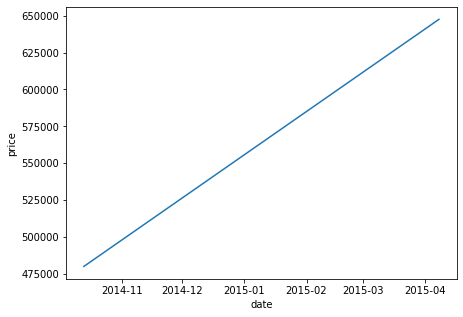

In [1291]:
plt.figure(figsize=(7,5))
sns.lineplot(y='price', x='date', data=df_vendas[df_vendas['id'] == 8832900780]);

In [1292]:
df_vendas[df_vendas['id'] == 4204400098]['price']

5273    385000.0
5272    250000.0
Name: price, dtype: float64

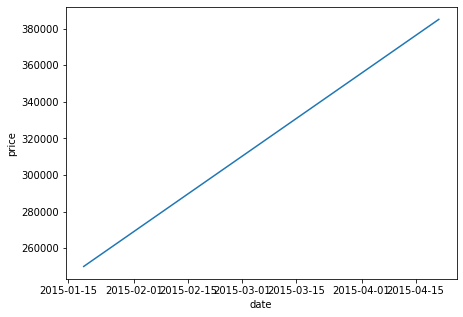

In [1293]:
plt.figure(figsize=(7,5))
sns.lineplot(y='price', x='date', data=df_vendas[df_vendas['id'] == 4204400098]);

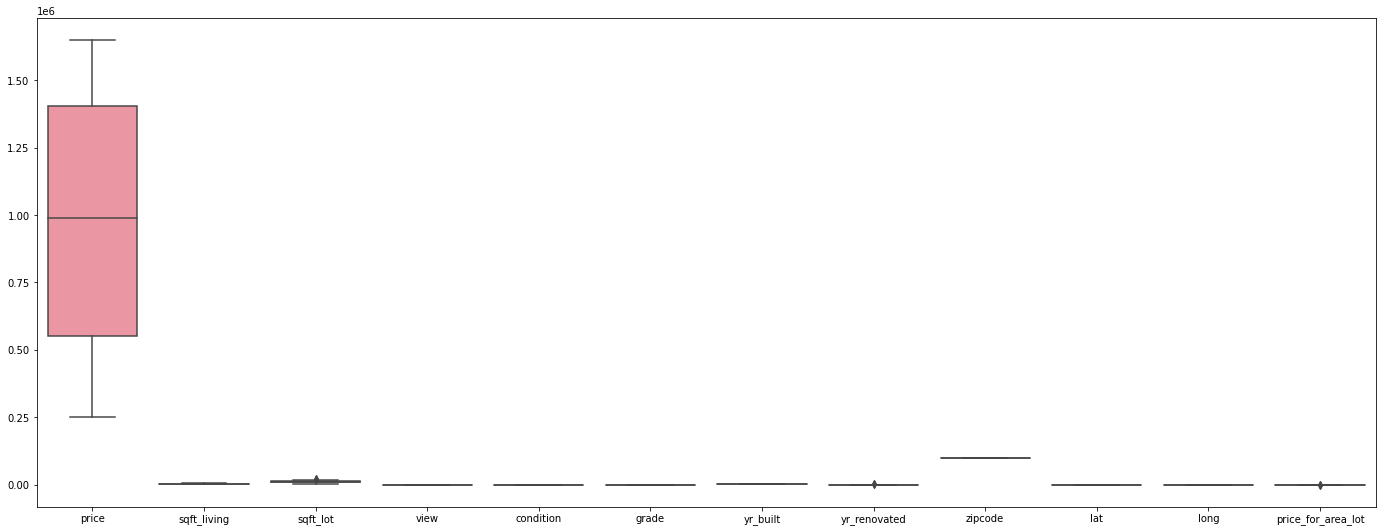

In [1294]:
plt.figure(figsize=(24, 9))
sns.boxplot(data=df_vendas.drop('id', axis=1));

In [1295]:
df_vendas['city'].unique()

array(['Kenmore', 'Renton', 'Sammamish', 'Bellevue', 'Seattle'],
      dtype=object)

In [1296]:
df_vendas['city'].value_counts()

Bellevue     8
Kenmore      2
Renton       2
Sammamish    2
Seattle      2
Name: city, dtype: int64

In [1297]:
# nosso DF, esse só com os imóveis com mais de uma venda:

df_vendas[df_vendas.duplicated(subset='id', keep=False)]

# 1. Declarando novo df com os dados da primeira venda dos dos imóveis que tem
# multiplas vendas.

df_multsells = df_vendas[df_vendas.duplicated(subset='id', keep='last')]

# 2. Obtendo os valores de data e preço dos mesmos imóveis, só que agora da última
# venda.

df_lastsell = pd.DataFrame(df_vendas[df_vendas.duplicated(subset='id', keep='first')]['price'])
df_lastsell_date = pd.DataFrame(df_vendas[df_vendas.duplicated(subset='id', keep='first')]['date'])

# 3.  Adicionando as colunas do último preço e última data no dataframe, para 
# compararmos os preços lado a lado.

df_multsells.insert(loc=2, column='last date', value = df_lastsell_date)
df_multsells.insert(loc=4, column='last price', value = df_lastsell)

# 4. Adicionando uma coluna de diferença entre os preços e datas. 
# A diferença de data é obtida no formato timedelta64. Foi realizada a 
# conversão para números inteiros.

df_multsells.insert(loc=3, column='date difference', value = (df_multsells['last date'] - df_multsells['date']).astype('timedelta64[D]').astype(int))
df_multsells.insert(loc=6, column='price difference', value = df_multsells['last price'] - df_multsells['price'])

# 5. Adicionando uma coluna do % de diferença de preços, mantendo apenas 2 casas
# decimais

df_multsells.insert(loc=7, column='price difference %', value = (df_multsells['price difference'] / df_multsells['price'] * 100).round(decimals=2))

# 6. Deletando variáveis que não serão mais usadas:

del df_lastsell
del df_lastsell_date

df_multsells.head()

,id,date,last date,date difference,price,last price,price difference,price difference %,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
6434,8832900780,2014-10-13,2015-04-08,177,480000.0,647500.0,167500.0,34.90,1760,21562,1,3,8,1959,0,98028,47.7597,-122.263,Kenmore,22.261386
5273,4204400098,2015-04-21,2015-01-19,-92,385000.0,250000.0,-135000.0,-35.06,2190,8250,2,3,7,1963,0,98055,47.4887,-122.223,Renton,46.666667
3951,1825069031,2014-10-16,2014-08-14,-63,550000.0,550000.0,0.0,0.00,2410,8447,3,4,8,1936,1980,98074,47.6499,-122.088,Sammamish,65.111874
314,4139480200,2014-12-09,2014-06-18,-174,1400000.0,1384000.0,-16000.0,-1.14,4290,12103,3,3,11,1997,0,98006,47.5503,-122.102,Bellevue,115.673800
7846,4139420590,2014-08-27,2014-05-20,-99,1200000.0,1212500.0,12500.0,1.04,4560,16643,3,3,12,1995,0,98006,47.5521,-122.115,Bellevue,72.102385


1. A verificação de valor negativo para diferença de data entre as vendas, o que indicaria algum problema no código de seleção dos dados da primeira e segunda venda.

2. A verificação da existência de valor negativo na coluna 'price difference', o que indicaria a existência de um imóvel que teve desvalorização entre a primeira e última venda.

In [1298]:
print(f"Existe erro na coleta da selação de data: {(df_multsells['date difference'] < 0).any().any()}")
print(f"Existe desvalorização em algum imóvel: {(df_multsells['price difference'] < 0).any().any()}")

Existe erro na coleta da selação de data: True
Existe desvalorização em algum imóvel: True


> Levando em consideração que no nosso dataframe principal já possui uma coluna de preço por área, foi também adicionada a coluna de preço por área baseada no preço da última venda dos imóveis:

In [1299]:
df_multsells.insert(loc=8, column='last price/sqft_living', value= df_multsells['last price'] / df_multsells['sqft_living'])
df_multsells.head()

,id,date,last date,date difference,price,last price,price difference,price difference %,last price/sqft_living,sqft_living,...,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
6434,8832900780,2014-10-13,2015-04-08,177,480000.0,647500.0,167500.0,34.90,367.897727,1760,...,1,3,8,1959,0,98028,47.7597,-122.263,Kenmore,22.261386
5273,4204400098,2015-04-21,2015-01-19,-92,385000.0,250000.0,-135000.0,-35.06,114.155251,2190,...,2,3,7,1963,0,98055,47.4887,-122.223,Renton,46.666667
3951,1825069031,2014-10-16,2014-08-14,-63,550000.0,550000.0,0.0,0.00,228.215768,2410,...,3,4,8,1936,1980,98074,47.6499,-122.088,Sammamish,65.111874
314,4139480200,2014-12-09,2014-06-18,-174,1400000.0,1384000.0,-16000.0,-1.14,322.610723,4290,...,3,3,11,1997,0,98006,47.5503,-122.102,Bellevue,115.673800
7846,4139420590,2014-08-27,2014-05-20,-99,1200000.0,1212500.0,12500.0,1.04,265.899123,4560,...,3,3,12,1995,0,98006,47.5521,-122.115,Bellevue,72.102385


In [1300]:
df_multsells.insert(loc=8, column='valorization per day', value= df_multsells['price difference %'] / df_multsells['date difference'])
df_multsells.sort_values(by='valorization per day', ascending=False)

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,last price/sqft_living,...,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
5273,4204400098,2015-04-21,2015-01-19,-92,385000.0,250000.0,-135000.0,-35.06,0.381087,114.155251,...,2,3,7,1963,0,98055,47.4887,-122.223,Renton,46.666667
6434,8832900780,2014-10-13,2015-04-08,177,480000.0,647500.0,167500.0,34.90,0.197175,367.897727,...,1,3,8,1959,0,98028,47.7597,-122.263,Kenmore,22.261386
9277,8129700644,2014-07-03,2015-04-24,295,715000.0,780000.0,65000.0,9.09,0.030814,375.000000,...,4,3,8,1997,0,98103,47.6598,-122.355,Seattle,317.777778
18991,7856400300,2014-07-02,2015-03-22,263,1411600.0,1505000.0,93400.0,6.62,0.025171,473.270440,...,4,5,10,1985,0,98006,47.5617,-122.158,Bellevue,150.170213
2564,7856400240,2014-06-27,2015-02-11,229,1620000.0,1650000.0,30000.0,1.85,0.008079,423.076923,...,4,5,10,1972,0,98006,47.5605,-122.158,Bellevue,166.153846
314,4139480200,2014-12-09,2014-06-18,-174,1400000.0,1384000.0,-16000.0,-1.14,0.006552,322.610723,...,3,3,11,1997,0,98006,47.5503,-122.102,Bellevue,115.673800
3951,1825069031,2014-10-16,2014-08-14,-63,550000.0,550000.0,0.0,0.00,-0.000000,228.215768,...,3,4,8,1936,1980,98074,47.6499,-122.088,Sammamish,65.111874
7846,4139420590,2014-08-27,2014-05-20,-99,1200000.0,1212500.0,12500.0,1.04,-0.010505,265.899123,...,3,3,12,1995,0,98006,47.5521,-122.115,Bellevue,72.102385


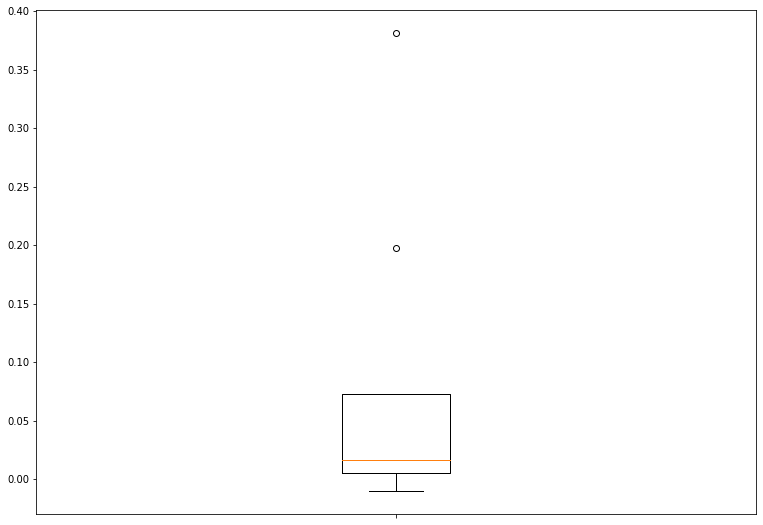

In [1301]:
data = df_multsells['valorization per day']
 
fig = plt.figure(figsize =(10, 7))
 
# Criando as instâncias do axis
ax = fig.add_axes([0, 0, 1, 1])
 
# Criando o boxplot
bp = ax.boxplot(data)

# Tirando os ticks
plt.xticks([1], [''])

 
# Imprimindo
plt.show()

In [1302]:
df_multsells['valorization per day'].describe()

count    8.000000
mean     0.079797
std      0.138856
min     -0.010505
25%      0.004914
50%      0.016625
75%      0.072404
max      0.381087
Name: valorization per day, dtype: float64

> Agora faremos a organização por ordem decrescente de valorização diária o dataset de imóveis com múltiplas vendas, a fim de verificar as maiores (topo da tabela abaixo) e menores (últimos 5 itens da tabela abaixo) valorizações.

In [1303]:
df_multsells.sort_values(by='valorization per day', axis=0, ascending=False)

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,last price/sqft_living,...,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
5273,4204400098,2015-04-21,2015-01-19,-92,385000.0,250000.0,-135000.0,-35.06,0.381087,114.155251,...,2,3,7,1963,0,98055,47.4887,-122.223,Renton,46.666667
6434,8832900780,2014-10-13,2015-04-08,177,480000.0,647500.0,167500.0,34.90,0.197175,367.897727,...,1,3,8,1959,0,98028,47.7597,-122.263,Kenmore,22.261386
9277,8129700644,2014-07-03,2015-04-24,295,715000.0,780000.0,65000.0,9.09,0.030814,375.000000,...,4,3,8,1997,0,98103,47.6598,-122.355,Seattle,317.777778
18991,7856400300,2014-07-02,2015-03-22,263,1411600.0,1505000.0,93400.0,6.62,0.025171,473.270440,...,4,5,10,1985,0,98006,47.5617,-122.158,Bellevue,150.170213
2564,7856400240,2014-06-27,2015-02-11,229,1620000.0,1650000.0,30000.0,1.85,0.008079,423.076923,...,4,5,10,1972,0,98006,47.5605,-122.158,Bellevue,166.153846
314,4139480200,2014-12-09,2014-06-18,-174,1400000.0,1384000.0,-16000.0,-1.14,0.006552,322.610723,...,3,3,11,1997,0,98006,47.5503,-122.102,Bellevue,115.673800
3951,1825069031,2014-10-16,2014-08-14,-63,550000.0,550000.0,0.0,0.00,-0.000000,228.215768,...,3,4,8,1936,1980,98074,47.6499,-122.088,Sammamish,65.111874
7846,4139420590,2014-08-27,2014-05-20,-99,1200000.0,1212500.0,12500.0,1.04,-0.010505,265.899123,...,3,3,12,1995,0,98006,47.5521,-122.115,Bellevue,72.102385


In [1304]:
df_multsells.describe()

,id,date difference,price,last price,price difference,price difference %,valorization per day,last price/sqft_living,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,price_for_area_lot
count,8.000000e+00,8.000000,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,5.872971e+09,67.000000,9.702000e+05,9.973750e+05,27175.000000,2.162500,0.079797,321.265744,3046.250000,11050.625000,3.000000,3.625000,9.250000,1975.500000,247.500000,98035.500000,47.597837,-122.182750,119.489744
std,2.588486e+09,191.446374,4.897609e+05,5.081814e+05,88345.276371,19.056527,0.138856,115.358560,1089.638702,5847.596672,1.069045,0.916125,1.752549,22.025959,700.035713,37.713203,0.085950,0.091841,94.423517
min,1.825069e+09,-174.000000,3.850000e+05,2.500000e+05,-135000.000000,-35.060000,-0.010505,114.155251,1760.000000,2250.000000,1.000000,3.000000,7.000000,1936.000000,0.000000,98006.000000,47.488700,-122.355000,22.261386
25%,4.139465e+09,-93.750000,5.325000e+05,6.231250e+05,-4000.000000,-0.285000,0.004914,256.478284,2162.500000,8397.750000,2.750000,3.000000,8.000000,1962.000000,0.000000,98006.000000,47.551650,-122.233000,60.500572
50%,6.030400e+09,57.000000,9.575000e+05,9.962500e+05,21250.000000,1.445000,0.016625,345.254225,2795.000000,9575.000000,3.000000,3.000000,9.000000,1978.500000,0.000000,98017.000000,47.561100,-122.158000,93.888093
75%,7.924725e+09,237.500000,1.402900e+06,1.414250e+06,72100.000000,7.237500,0.072404,387.019231,3997.500000,13238.000000,4.000000,4.250000,10.250000,1995.500000,0.000000,98059.750000,47.652375,-122.111750,154.166121
max,8.832901e+09,295.000000,1.620000e+06,1.650000e+06,167500.000000,34.900000,0.381087,473.270440,4560.000000,21562.000000,4.000000,5.000000,12.000000,1997.000000,1980.000000,98103.000000,47.759700,-122.088000,317.777778


In [1305]:
df_valorizados = df_multsells.loc[df_multsells['valorization per day'] > 0.004914]
df_valorizados

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,last price/sqft_living,...,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
6434,8832900780,2014-10-13,2015-04-08,177,480000.0,647500.0,167500.0,34.90,0.197175,367.897727,...,1,3,8,1959,0,98028,47.7597,-122.263,Kenmore,22.261386
5273,4204400098,2015-04-21,2015-01-19,-92,385000.0,250000.0,-135000.0,-35.06,0.381087,114.155251,...,2,3,7,1963,0,98055,47.4887,-122.223,Renton,46.666667
314,4139480200,2014-12-09,2014-06-18,-174,1400000.0,1384000.0,-16000.0,-1.14,0.006552,322.610723,...,3,3,11,1997,0,98006,47.5503,-122.102,Bellevue,115.673800
18991,7856400300,2014-07-02,2015-03-22,263,1411600.0,1505000.0,93400.0,6.62,0.025171,473.270440,...,4,5,10,1985,0,98006,47.5617,-122.158,Bellevue,150.170213
9277,8129700644,2014-07-03,2015-04-24,295,715000.0,780000.0,65000.0,9.09,0.030814,375.000000,...,4,3,8,1997,0,98103,47.6598,-122.355,Seattle,317.777778
2564,7856400240,2014-06-27,2015-02-11,229,1620000.0,1650000.0,30000.0,1.85,0.008079,423.076923,...,4,5,10,1972,0,98006,47.5605,-122.158,Bellevue,166.153846


* O dataframe acima contém apenas os imóveis com o terceiro quartil de valorização (os 25% mais valorizados).

In [1306]:
import plotly.express as px

fig = px.density_mapbox(df_valorizados, lat='lat', lon='long', z='valorization per day', radius=20,
                        center=dict(lat=df_valorizados["lat"].mean(), lon=df_valorizados["long"].mean()), zoom=7,
                        mapbox_style="stamen-terrain")
fig.show()

## Estipulando o intervalo de preço mínimo do nosso perfil de imóvel:

In [1307]:
df_valorizados.describe()

,id,date difference,price,last price,price difference,price difference %,valorization per day,last price/sqft_living,sqft_living,sqft_lot,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,price_for_area_lot
count,6.000000e+00,6.000000,6.000000e+00,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000
mean,6.836547e+09,116.333333,1.001933e+06,1.036083e+06,34150.000000,2.710000,0.108146,346.001844,2900.000000,10552.500000,3.000000,3.666667,9.000000,1978.833333,0.0,98034.000000,47.596783,-122.209833,136.450615
std,2.094767e+09,198.747746,5.373346e+05,5.571939e+05,103332.932795,22.513656,0.152068,124.706193,1047.530429,6321.683565,1.264911,1.032796,1.549193,16.666333,0.0,38.961519,0.096853,0.090636,105.339511
min,4.139480e+09,-174.000000,3.850000e+05,2.500000e+05,-135000.000000,-35.060000,0.006552,114.155251,1760.000000,2250.000000,1.000000,3.000000,7.000000,1959.000000,0.0,98006.000000,47.488700,-122.355000,22.261386
25%,5.117400e+09,-24.750000,5.387500e+05,6.806250e+05,-4500.000000,-0.392500,0.012352,333.932474,2107.500000,8537.500000,2.250000,3.000000,8.000000,1965.250000,0.0,98006.000000,47.552850,-122.253000,63.918450
50%,7.856400e+09,203.000000,1.057500e+06,1.082000e+06,47500.000000,4.235000,0.027992,371.448864,2685.000000,9575.000000,3.500000,3.000000,9.000000,1978.500000,0.0,98017.000000,47.561100,-122.190500,132.922006
75%,8.061376e+09,254.500000,1.408700e+06,1.474750e+06,86300.000000,8.472500,0.155585,411.057692,3720.000000,11514.750000,4.000000,4.500000,10.000000,1994.000000,0.0,98048.250000,47.635275,-122.158000,162.157938
max,8.832901e+09,295.000000,1.620000e+06,1.650000e+06,167500.000000,34.900000,0.381087,473.270440,4290.000000,21562.000000,4.000000,5.000000,11.000000,1997.000000,0.0,98103.000000,47.759700,-122.102000,317.777778


In [1316]:
filter_price = df_valorizados['price'] >= 4.387500e+05
filter_price2 = df_valorizados['price'] <= 	1.620000e+06

## Estipulando a quantidade de quartos do nosso perfil de imóvel bem valorizado:

Estipulando o valor de condição do nosso perfil:

In [1309]:
filter_condition = df_valorizados['condition'] > 3

Definindo o valor do parâmetro "grade" do perfil de imóvel com potencial de valorização.

In [1310]:
filter_grade = df_valorizados['grade'] > 7

Definindo o valor do parâmetro "view" do perfil de imóvel com potencial de valorização.

In [1317]:
df_valor_filtrado = df_valorizados[filter_price & filter_price2]

df_valor_filtrado.sort_values(by='price', ascending=False)

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,last price/sqft_living,...,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,city,price_for_area_lot
2564,7856400240,2014-06-27,2015-02-11,229,1620000.0,1650000.0,30000.0,1.85,0.008079,423.076923,...,4,5,10,1972,0,98006,47.5605,-122.158,Bellevue,166.153846
18991,7856400300,2014-07-02,2015-03-22,263,1411600.0,1505000.0,93400.0,6.62,0.025171,473.270440,...,4,5,10,1985,0,98006,47.5617,-122.158,Bellevue,150.170213
314,4139480200,2014-12-09,2014-06-18,-174,1400000.0,1384000.0,-16000.0,-1.14,0.006552,322.610723,...,3,3,11,1997,0,98006,47.5503,-122.102,Bellevue,115.673800
9277,8129700644,2014-07-03,2015-04-24,295,715000.0,780000.0,65000.0,9.09,0.030814,375.000000,...,4,3,8,1997,0,98103,47.6598,-122.355,Seattle,317.777778
6434,8832900780,2014-10-13,2015-04-08,177,480000.0,647500.0,167500.0,34.90,0.197175,367.897727,...,1,3,8,1959,0,98028,47.7597,-122.263,Kenmore,22.261386
